# DECLARAMOS LAS LIBRERIAS #

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.neighbors import KernelDensity

# CARGAMOS LOS PRUEBAS QUE SON CORRECTAS #

In [2]:
df = pd.read_csv('experimental_data.csv')
df.shape

(10, 15)

In [3]:
X = df.iloc[:, 1:15] 

In [4]:
X.head()

,Largo_24,Ancho_24,Largo_48,Ancho_48,Largo_72,Ancho_72,Largo_96,Ancho_96,Largo_120,Ancho_120,Largo_144,Ancho_144,Largo_168,Ancho_168
0,682.54,518.28,696.67,546.57,709.17,535.85,928.58,716.29,915.92,739.04,973.45,702.40,1073.42,824.69
1,641.26,583.49,670.88,591.67,676.28,573.60,890.68,669.90,803.73,690.07,865.35,808.97,909.23,886.37
2,707.53,558.40,745.78,540.54,735.86,570.17,934.01,687.43,956.67,718.37,1013.99,751.33,1024.18,891.69
3,700.31,584.17,661.71,606.90,717.17,594.54,811.61,680.59,936.10,771.09,963.66,795.07,1000.40,987.65
4,654.94,634.39,665.15,632.51,663.34,637.80,673.37,757.11,824.57,744.92,886.94,797.50,985.06,840.04


# UTILIZAMOS KERNEL DENSITY

Para estimar la densidad de los datos y luego generar nuevas muestras a partir de esta densidad.

In [5]:
kde = KernelDensity(kernel='gaussian', bandwidth=1.0).fit(X)

new_samples = kde.sample(5)


df_new_samples = pd.DataFrame(new_samples, columns=X.columns)

df_new_samples.head()

,Largo_24,Ancho_24,Largo_48,Ancho_48,Largo_72,Ancho_72,Largo_96,Ancho_96,Largo_120,Ancho_120,Largo_144,Ancho_144,Largo_168,Ancho_168
0,701.022689,584.519116,659.789159,608.014934,718.226233,593.502329,810.737231,679.982756,936.345216,770.976526,963.188749,795.102542,1001.634959,988.791543
1,657.015047,639.526767,662.627754,647.503529,701.197600,672.208756,873.755664,817.032008,846.983556,819.910117,932.716982,865.271739,941.509513,906.739203
2,681.633892,554.963551,685.565258,572.433306,674.394097,551.792911,811.742895,681.319299,849.550772,708.186907,930.406802,734.328057,956.136380,938.062817
3,682.398445,554.622994,683.300353,570.066056,675.773644,553.156257,808.795230,680.719505,851.674662,707.759364,932.917293,736.777369,956.026510,940.374217
4,641.256942,581.788892,671.568286,590.482710,675.265205,572.296077,889.575454,670.395131,803.684209,689.397637,867.046382,807.771923,908.261789,886.421576


In [6]:
columns_largos = ['Largo_24','Largo_48','Largo_72','Largo_96','Largo_120', 'Largo_144', 'Largo_168']
columns_anchos = ['Ancho_24','Ancho_48','Ancho_72','Ancho_96','Ancho_120', 'Ancho_144', 'Ancho_168']

# CALCULAMOS LOS VALORES PARA CADA INTERVALO DE TIEMPO 

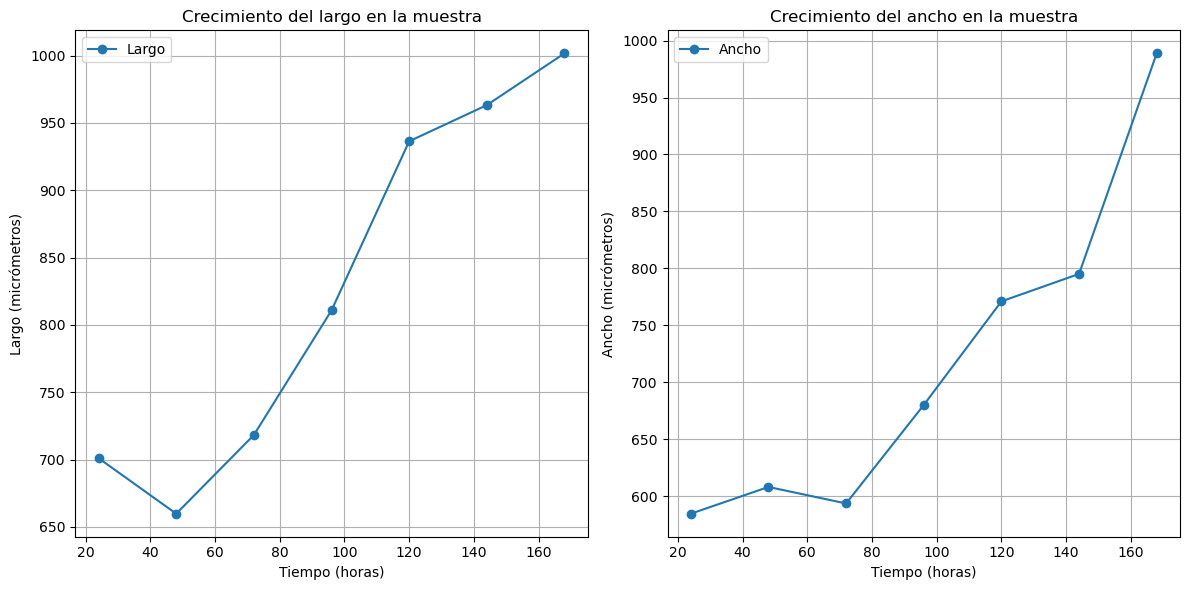

Tiempo: 24 horas -> Largo: 701.02 µm, Ancho: 584.52 µm
Tiempo: 48 horas -> Largo: 659.79 µm, Ancho: 608.01 µm
Tiempo: 72 horas -> Largo: 718.23 µm, Ancho: 593.50 µm
Tiempo: 96 horas -> Largo: 810.74 µm, Ancho: 679.98 µm
Tiempo: 120 horas -> Largo: 936.35 µm, Ancho: 770.98 µm
Tiempo: 144 horas -> Largo: 963.19 µm, Ancho: 795.10 µm
Tiempo: 168 horas -> Largo: 1001.63 µm, Ancho: 988.79 µm


In [7]:
# Tiempos de medición (en horas)
tiempos = np.array([24, 48, 72, 96, 120, 144, 168])

#Obtenemos los valores de la primera muestra generada con Kernel
largos = df_new_samples[columns_largos].iloc[0].values
anchos = df_new_samples[columns_anchos].iloc[0].values

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Gráfico para largos
plt.subplot(1, 2, 1)
plt.plot(tiempos, largos, 'o-', label='Largo')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Largo (micrómetros)')
plt.title('Crecimiento del largo en la muestra')
plt.legend()
plt.grid(True)

# Gráfico para anchos
plt.subplot(1, 2, 2)
plt.plot(tiempos, anchos, 'o-', label='Ancho')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Ancho (micrómetros)')
plt.title('Crecimiento del ancho en la muestra')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Mostrar resultados
for dimensiones in list(zip(tiempos,largos, anchos)):
    tiempo, largo, ancho = dimensiones
    print(f"Tiempo: {tiempo} horas -> Largo: {largo:.2f} µm, Ancho: {ancho:.2f} µm")


# DEFINIMOS LOS PARAMETROS PARA LAS GRÁFICAS

In [8]:
# Definir los parámetros de los esferoides
# Datos iniciales
c1 = largos[0] # Distancia desde el centro hasta el polo del primer esferoide(Largo)
a1 = anchos[0] # Semieje ecuatorial del primer esferoide(Ancho)

c2 = largos[6]# Distancia desde el centro hasta el polo del segundo esferoide(Largo)
a2 = anchos[6]# Semieje ecuatorial del segundo esferoide(Ancho)

In [9]:
# Crear valores para los ángulos phi y theta
phi = np.linspace(0, 2 * np.pi, 100)
theta = np.linspace(0, np.pi, 100)

In [10]:
# Calcular las coordenadas cartesianas de los dos esferoides
x1 = a1 * np.outer(np.cos(phi), np.sin(theta))
y1 = a1 * np.outer(np.sin(phi), np.sin(theta))
z1 = c1 * np.outer(np.ones(np.size(phi)), np.cos(theta))

x2 = a2 * np.outer(np.cos(phi), np.sin(theta))
y2 = a2 * np.outer(np.sin(phi), np.sin(theta))
z2 = c2 * np.outer(np.ones(np.size(phi)), np.cos(theta))

# GRAFICO UNO SOBRE OTRO

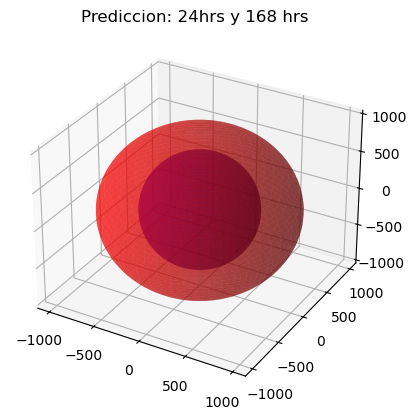

In [11]:
# Crear la figura y los ejes 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los dos esferoides
ax.plot_surface(x1, y1, z1, color='b', alpha=0.5)
ax.plot_surface(x2, y2, z2, color='r', alpha=0.5)

# Ajustar la relación de aspecto de los ejes
ax.set_aspect('auto')
ax.set_title('Prediccion: 24hrs y 168 hrs')

# Mostrar el gráfico
plt.show()


# GRAFICO INICIO-FINAL

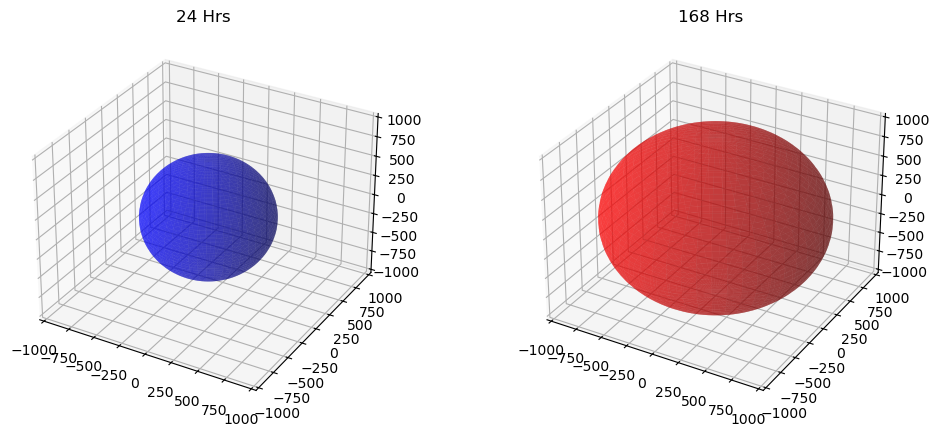

In [12]:
#Encontrar limites inferiores y maximos
max_lim = max(np.max(x1), np.max(y1), np.max(z1), np.max(x2), np.max(y2), np.max(z2))
min_lim = min(np.min(x1), np.min(y1), np.min(z1), np.min(x2), np.min(y2), np.min(z2))

# Crear las figuras y los ejes 3D
fig = plt.figure(figsize=(12, 5))

# Subgráfico 1
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x1, y1, z1, color='b', alpha=0.5)
ax1.set_title('24 Hrs')
ax1.set_xlim(min_lim, max_lim)
ax1.set_ylim(min_lim, max_lim)
ax1.set_zlim(min_lim, max_lim)


# Subgráfico 2
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x2, y2, z2, color='r', alpha=0.5)
ax2.set_title('168 Hrs')
ax2.set_xlim(min_lim, max_lim)
ax2.set_ylim(min_lim, max_lim)
ax2.set_zlim(min_lim, max_lim)

# Mostrar los gráficos
plt.show()

# GRAFICA DE INTERPOLADO 24-168hrs

En el análisis numérico, se denomina interpolación a obtención de nuevos puntos partiendo del conocimiento de un conjunto de puntos.

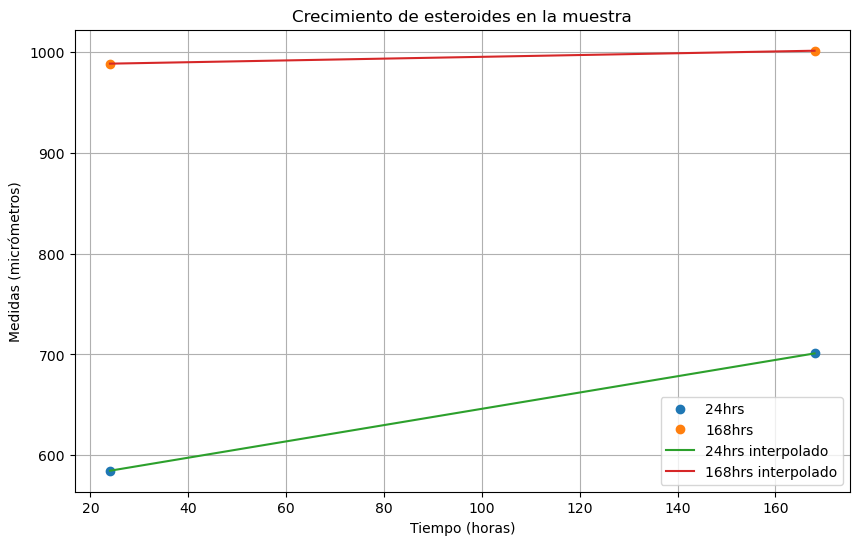

Tiempo: 24 horas -> Largo: 584.52 µm, Ancho: 988.79 µm
Tiempo: 168 horas -> Largo: 603.94 µm, Ancho: 990.93 µm


In [13]:
tiempos = np.array([24, 168])  # tiempos en horas
medidas_1 = np.array([a1, c1])  # largo 1 en micrómetros
medidas_2 = np.array([a2, c2])  # largo 2 en micrómetros

# Interpolación lineal para encontrar largos intermedios
tiempos_intermedios = np.array([24, 48, 72, 96, 120, 144, 168])  # tiempos intermedios

# Funciones de interpolación lineal
interp_medidas_1 = np.interp(tiempos_intermedios, tiempos, medidas_1)
interp_medidas_2 = np.interp(tiempos_intermedios, tiempos, medidas_2)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(tiempos, medidas_1, 'o', label='24hrs')
plt.plot(tiempos, medidas_2, 'o', label='168hrs')
plt.plot(tiempos_intermedios, interp_medidas_1, '-', label='24hrs interpolado')
plt.plot(tiempos_intermedios, interp_medidas_2, '-', label='168hrs interpolado')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Medidas (micrómetros)')
plt.title('Crecimiento de esteroides en la muestra')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar resultados
for dimensiones in list(zip(tiempos,interp_medidas_1, interp_medidas_2)):
    tiempo, largo, ancho = dimensiones
    print(f"Tiempo: {tiempo} horas -> Largo: {largo:.2f} µm, Ancho: {ancho:.2f} µm")
    